Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - BlackBlack</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

## Data Loading and Initial Inspection:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Read the data
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

# Display the first few rows of the dataset
crimes.head()

# Set the Seaborn style
sns.set_style("whitegrid")

In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  object        
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


In [4]:
crimes.describe()

,DR_NO,Date Rptd,DATE OCC,Vict Age
count,2.479880e+05,247988,247988,247988.000000
mean,2.256571e+08,2022-12-14 01:18:45.751246080,2022-12-01 12:02:48.627514368,29.954764
min,2.203000e+03,2022-06-01 00:00:00,2020-01-01 00:00:00,-2.000000
25%,2.210130e+08,2022-09-06 00:00:00,2022-08-27 00:00:00,0.000000
50%,2.220131e+08,2022-12-13 00:00:00,2022-12-04 00:00:00,31.000000
75%,2.310058e+08,2023-03-23 00:00:00,2023-03-16 00:00:00,45.000000
max,2.399165e+08,2023-07-03 00:00:00,2023-07-03 00:00:00,99.000000
std,5.042345e+06,NaN,NaN,21.901016


## Data Preprocessing:

In [5]:
# Drop unnecessary columns
crimes.drop(['DR_NO', 'Date Rptd', 'LOCATION'], axis=1, inplace=True)

In [6]:
# For uniformity, convert column headers to upper case
crimes.rename(columns=str.upper, inplace=True)

In [7]:
crimes

,DATE OCC,TIME OCC,AREA NAME,CRM CD DESC,VICT AGE,VICT SEX,VICT DESCENT,WEAPON DESC,STATUS DESC
0,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont
1,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont
2,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont
3,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont
4,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont
...,...,...,...,...,...,...,...,...,...
247983,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont
247984,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont
247985,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont
247986,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont


### Convert to datetime and extract the hours, years, month, day

In [8]:
# Add a colon to separate hours and minutes
crimes['TIME OCC'] = crimes['TIME OCC'].str[:2] + ':' + crimes['TIME OCC'].str[2:]

# Convert to datetime
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'])

In [9]:
crimes.dtypes

DATE OCC        datetime64[ns]
TIME OCC        datetime64[ns]
AREA NAME               object
CRM CD DESC             object
VICT AGE                 int64
VICT SEX                object
VICT DESCENT            object
WEAPON DESC             object
STATUS DESC             object
dtype: object

In [10]:
# Extract year, month, day, hour, and day of the week from 'DATE OCC'
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])
crimes['YEAR OCC'] = crimes['DATE OCC'].dt.year
crimes['MONTH OCC'] = crimes['DATE OCC'].dt.month
crimes['DAY OCC'] = crimes['DATE OCC'].dt.day
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'])
crimes['HOUR OCC'] = crimes['TIME OCC'].dt.hour
crimes['DAY OF WEEK'] = crimes['DATE OCC'].dt.day_name()

# Check if 'DAY OF WEEK' column equals 'Sunday' or 'Saturday' and assign values accordingly
crimes['WEEKEND'] = (crimes['DAY OF WEEK'].isin(['Sunday', 'Saturday'])).astype(int)

In [11]:
# Drop 'DATE OCC' and 'TIME OCC' columns inplace
crimes.drop(columns=['DATE OCC', 'TIME OCC'], inplace=True)
crimes

,AREA NAME,CRM CD DESC,VICT AGE,VICT SEX,VICT DESCENT,WEAPON DESC,STATUS DESC,YEAR OCC,MONTH OCC,DAY OCC,HOUR OCC,DAY OF WEEK,WEEKEND
0,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,2020,11,12,17,Thursday,0
1,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2020,5,12,11,Tuesday,0
2,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,2020,6,4,16,Thursday,0
3,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,2020,8,17,12,Monday,0
4,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,2020,1,27,6,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247983,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,2023,5,25,11,Thursday,0
247984,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,2023,1,26,18,Thursday,0
247985,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,2023,3,22,10,Wednesday,0
247986,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2023,4,12,16,Wednesday,0


## Exploratory Data Analysis:

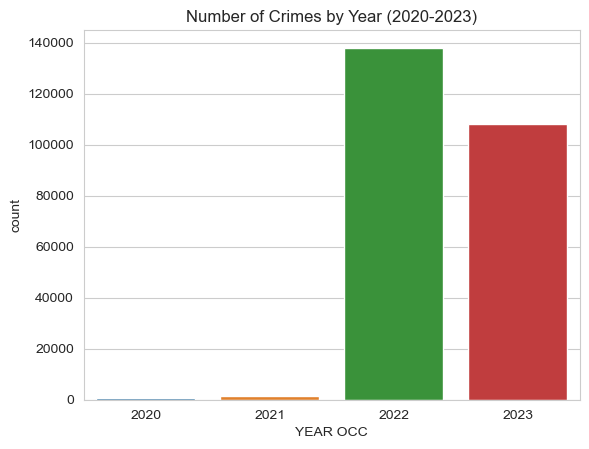

In [12]:
# Plotting
sns.countplot(data=crimes, x="YEAR OCC")
plt.title('Number of Crimes by Year (2020-2023)') 
plt.show()

In [13]:
crimes['YEAR OCC'].value_counts()

YEAR OCC
2022    137973
2023    107896
2021      1362
2020       757
Name: count, dtype: int64

In [14]:
"""Observation: The dataset contains significantly higher counts of crimes for the years 2022 and 2023 compared to 2020 and 2021.
This suggests a potential increase in crime rates in the later years of the dataset. It's worth noting that the years 2020 and 2021
coincided with the COVID-19 pandemic, which might have contributed to the lower crime rates during those years.
"""

"Observation: The dataset contains significantly higher counts of crimes for the years 2022 and 2023 compared to 2020 and 2021.\nThis suggests a potential increase in crime rates in the later years of the dataset. It's worth noting that the years 2020 and 2021\ncoincided with the COVID-19 pandemic, which might have contributed to the lower crime rates during those years.\n"

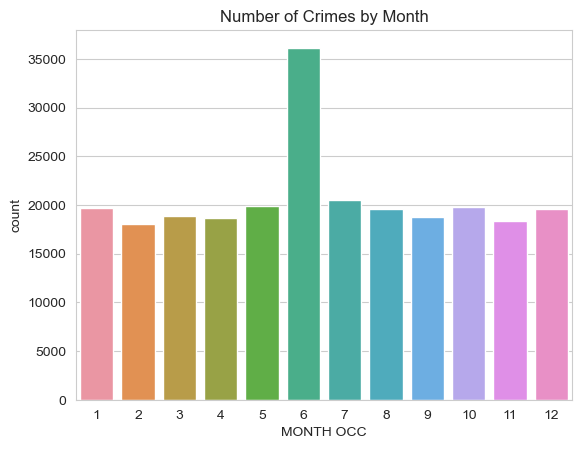

In [15]:
# Plotting
sns.countplot(data=crimes, x="MONTH OCC")
plt.title('Number of Crimes by Month')
plt.show()

In [16]:
crimes['MONTH OCC'].value_counts()

MONTH OCC
6     36155
7     20552
5     19850
10    19781
1     19649
8     19613
12    19566
3     18899
9     18799
4     18705
11    18326
2     18093
Name: count, dtype: int64

In [17]:
"""
Observation: 
The plot shows the distribution of crimes across different months. June has the highest number of crimes, followed by July and May.
On the other hand, February has the lowest number of crimes. This distribution may indicate seasonal variations in criminal activity.
"""

'\nObservation: \nThe plot shows the distribution of crimes across different months. June has the highest number of crimes, followed by July and May.\nOn the other hand, February has the lowest number of crimes. This distribution may indicate seasonal variations in criminal activity.\n'

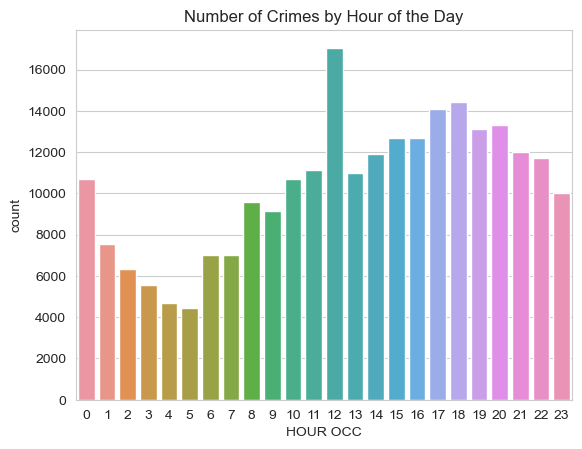

In [18]:
# Plotting
sns.countplot(data=crimes, x="HOUR OCC")
plt.title('Number of Crimes by Hour of the Day')
plt.show()

In [19]:
# Find the hour with the highest frequency of crimes
peak_crime_hour = crimes['HOUR OCC'].value_counts().idxmax()

print("Hour with the highest frequency of crimes:", peak_crime_hour)

Hour with the highest frequency of crimes: 12


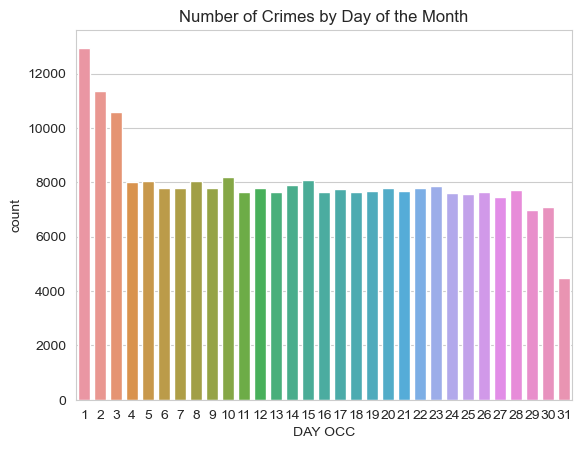

In [20]:
# Plotting
sns.countplot(data=crimes, x="DAY OCC")
plt.title('Number of Crimes by Day of the Month')
plt.show()

In [21]:
# Find the day in a month with the highest frequency of crimes
peak_crime_day = crimes['DAY OCC'].value_counts().idxmax()

print("Day in a month with the highest frequency of crimes:", peak_crime_day)

Day in a month with the highest frequency of crimes: 1


In [22]:
# Find the day in a month with the lowest frequency of crimes
low_crime_day = crimes['DAY OCC'].value_counts().idxmin()

print("Day in a month with the lowest frequency of crimes:", low_crime_day)

Day in a month with the lowest frequency of crimes: 31


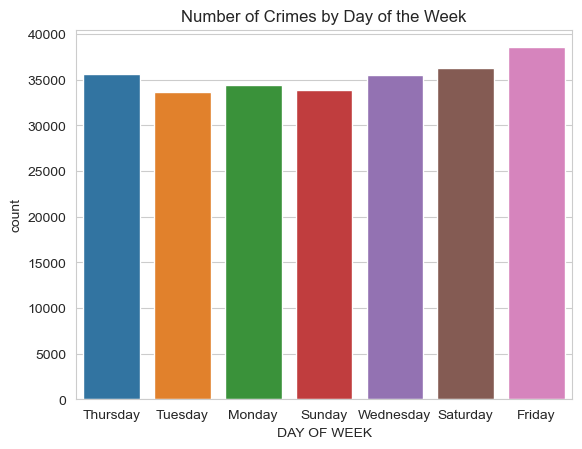

In [23]:
# Plotting
sns.countplot(data=crimes, x="DAY OF WEEK")
plt.title('Number of Crimes by Day of the Week')
plt.show()

In [24]:
# Display the count of crimes by day of the week
crimes['DAY OF WEEK'].value_counts()

DAY OF WEEK
Friday       38553
Saturday     36330
Thursday     35620
Wednesday    35547
Monday       34400
Sunday       33892
Tuesday      33646
Name: count, dtype: int64

In [25]:
# Replace 'H' and '-' with 'X' in the 'VICT SEX' column
crimes['VICT SEX'] = crimes['VICT SEX'].replace(['H', '-'], 'X')

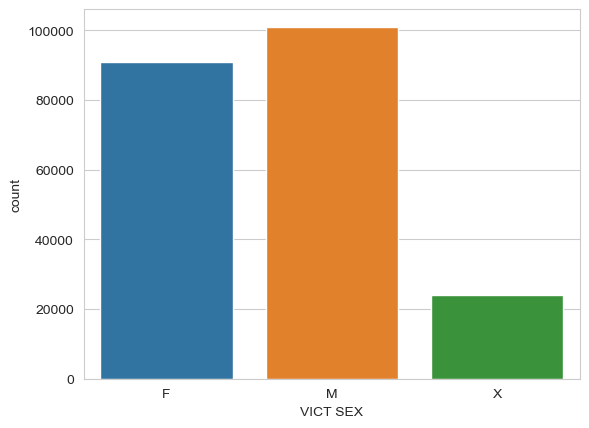

In [26]:
# Plotting
sns.countplot(data=crimes, x="VICT SEX")
plt.show()

In [27]:
# Display the count of crimes by victim sex
crimes['VICT SEX'].value_counts()

VICT SEX
M    101028
F     90804
X     23908
Name: count, dtype: int64

In [28]:
# Check for missing values in the dataset
crimes.isnull().sum()

AREA NAME            0
CRM CD DESC          0
VICT AGE             0
VICT SEX         32248
VICT DESCENT     32249
WEAPON DESC     167901
STATUS DESC          0
YEAR OCC             0
MONTH OCC            0
DAY OCC              0
HOUR OCC             0
DAY OF WEEK          0
WEEKEND              0
dtype: int64

In [29]:
# Replace null values in 'VICT SEX' column with 'X'
crimes['VICT SEX'].fillna('X', inplace=True)

In [30]:
# Verify if null values have been replaced
crimes.isnull().sum()

AREA NAME            0
CRM CD DESC          0
VICT AGE             0
VICT SEX             0
VICT DESCENT     32249
WEAPON DESC     167901
STATUS DESC          0
YEAR OCC             0
MONTH OCC            0
DAY OCC              0
HOUR OCC             0
DAY OF WEEK          0
WEEKEND              0
dtype: int64

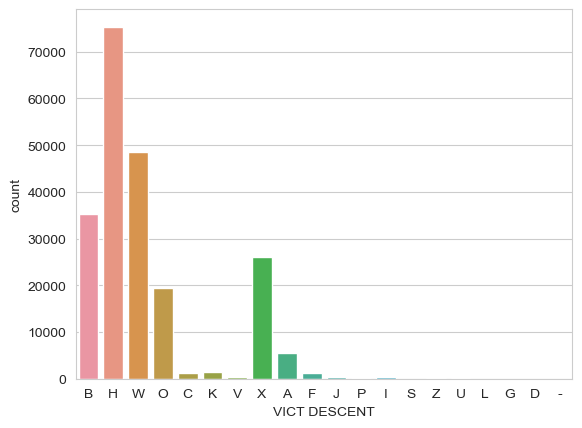

In [31]:
# Plotting
sns.countplot(data=crimes, x="VICT DESCENT")
plt.show()

In [32]:
print('Top 3 VICT DESCENT')
print('1: H - Hispanic/Latin/Mexican')
print('2: B - Black')
print('3: W - White')

Top 3 VICT DESCENT
1: H - Hispanic/Latin/Mexican
2: B - Black
3: W - White


In [33]:
# Display the top 10 victim descent categories
crimes['VICT DESCENT'].value_counts().head(10)

VICT DESCENT
H    75350
W    48593
B    35307
X    26059
O    19516
A     5610
K     1398
F     1232
C     1210
J      434
Name: count, dtype: int64

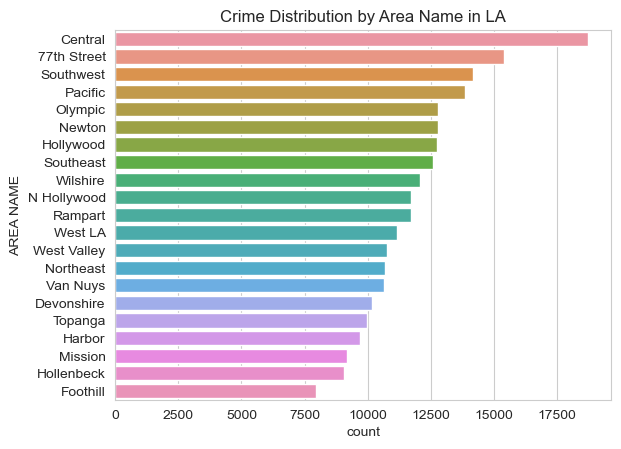

In [34]:
# Crime Distribution by Area
sns.countplot(data=crimes, y="AREA NAME", order=crimes['AREA NAME'].value_counts().index)
plt.title("Crime Distribution by Area Name in LA")
plt.show()

In [35]:
# Display the count of crimes by area name
crimes['AREA NAME'].value_counts()


AREA NAME
Central        18732
77th Street    15408
Southwest      14194
Pacific        13866
Olympic        12792
Newton         12790
Hollywood      12761
Southeast      12600
Wilshire       12080
N Hollywood    11728
Rampart        11725
West LA        11169
West Valley    10766
Northeast      10686
Van Nuys       10640
Devonshire     10184
Topanga         9968
Harbor          9701
Mission         9175
Hollenbeck      9063
Foothill        7960
Name: count, dtype: int64

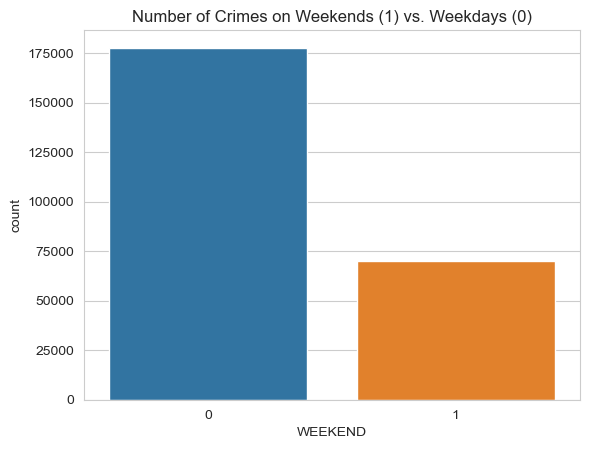

In [36]:
# Plotting
sns.countplot(data=crimes, x="WEEKEND")
plt.title('Number of Crimes on Weekends (1) vs. Weekdays (0)')
plt.show()

In [37]:
# Define age group bins
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

In [38]:
# Categorize victim ages into age groups
crimes['AGE GROUP'] = pd.cut(crimes['VICT AGE'], bins=bins, labels=labels)

# Count occurrences in each age group
victim_ages = crimes['AGE GROUP'].value_counts()
print(victim_ages)

AGE GROUP
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


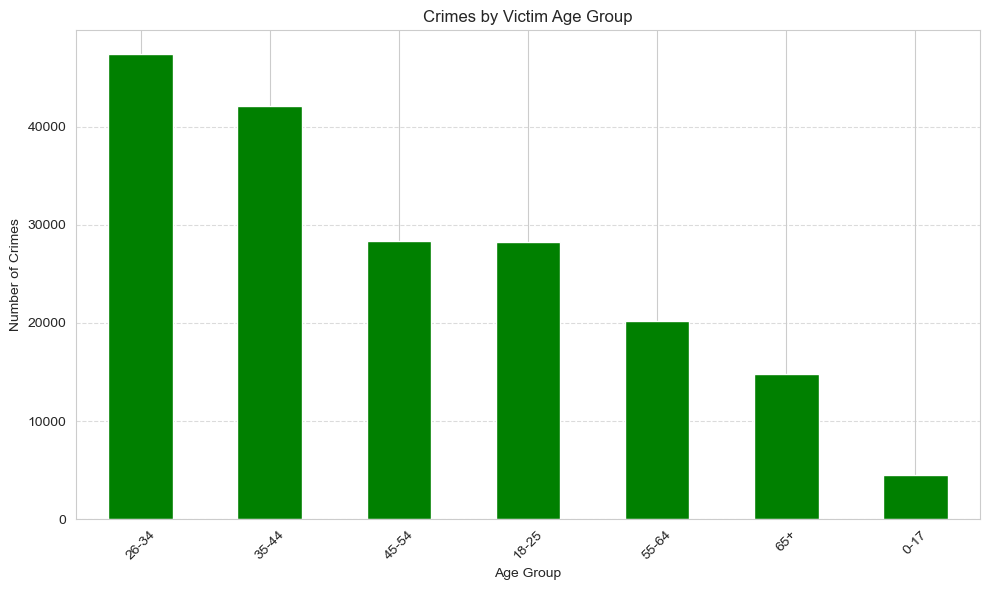

In [39]:
# Plotting
plt.figure(figsize=(10, 6))
victim_ages.plot(kind='bar', color='green')
plt.title('Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

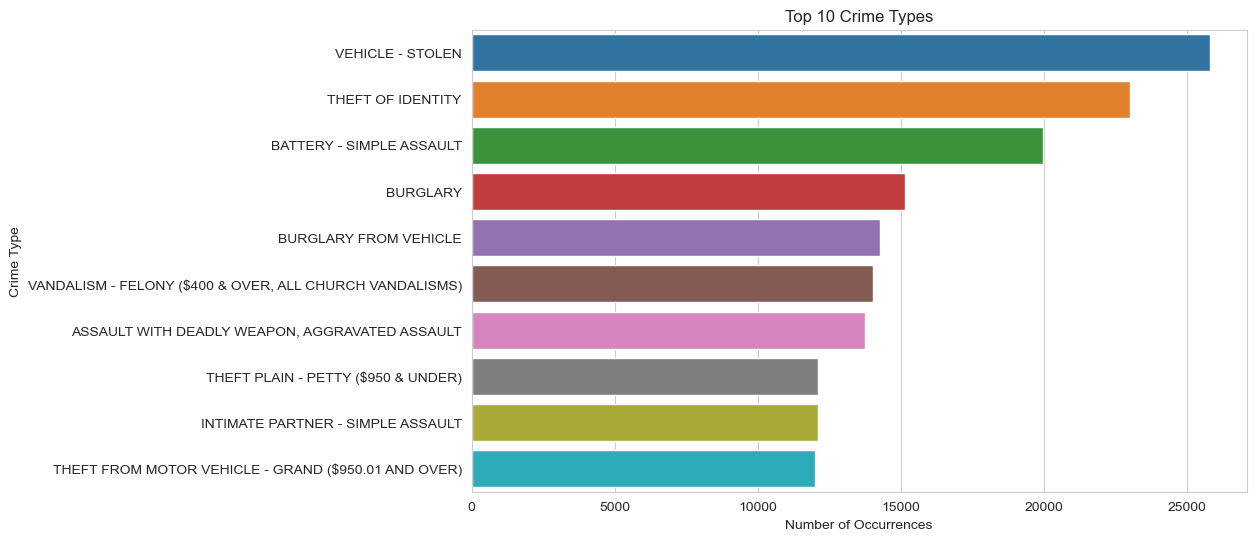

In [40]:
# Crime Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=crimes, y="CRM CD DESC", order=crimes['CRM CD DESC'].value_counts().index[:10])
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Occurrences')
plt.ylabel('Crime Type')
plt.show()

In [41]:
# Top 10 weapons used in crimes
top_10_weapons_in_crime =  crimes['WEAPON DESC'].value_counts().head(10)

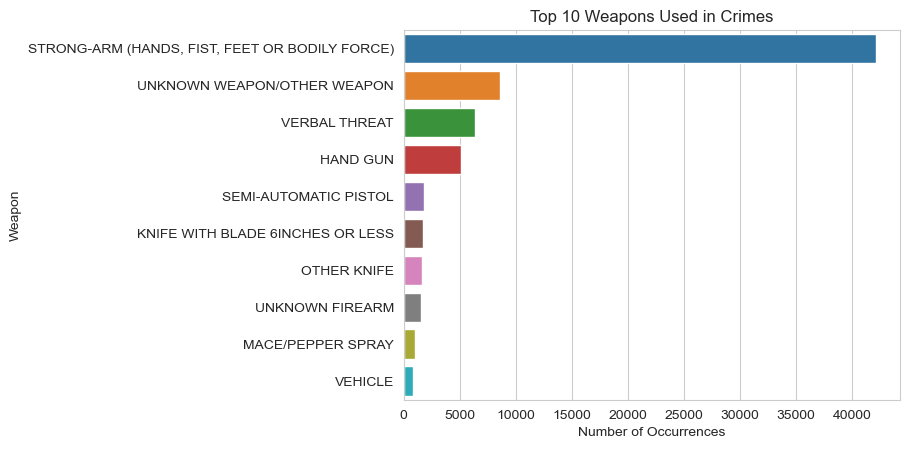

In [42]:
sns.countplot(data=crimes, y="WEAPON DESC", order=top_10_weapons_in_crime.index)
plt.title('Top 10 Weapons Used in Crimes')
plt.xlabel('Number of Occurrences')
plt.ylabel('Weapon')
plt.show()

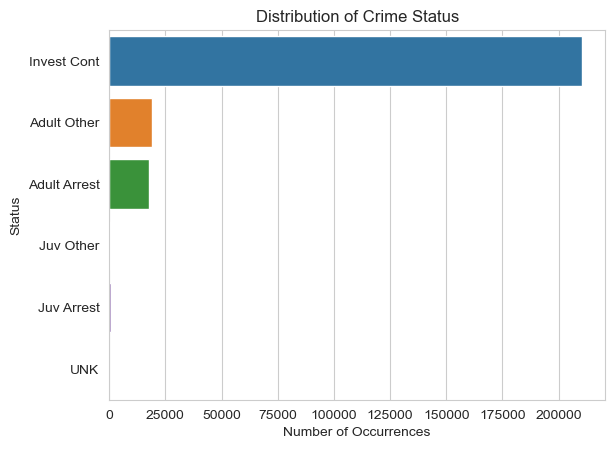

In [43]:
# Status of crimes
sns.countplot(data=crimes, y="STATUS DESC")
plt.title('Distribution of Crime Status')
plt.xlabel('Number of Occurrences')
plt.ylabel('Status')
plt.show()

In [44]:
crimes.head()

,AREA NAME,CRM CD DESC,VICT AGE,VICT SEX,VICT DESCENT,WEAPON DESC,STATUS DESC,YEAR OCC,MONTH OCC,DAY OCC,HOUR OCC,DAY OF WEEK,WEEKEND,AGE GROUP
0,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,X,NaN,NaN,Invest Cont,2020,11,12,17,Thursday,0,NaN
1,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2020,5,12,11,Tuesday,0,26-34
2,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,2020,6,4,16,Thursday,0,55-64
3,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,2020,8,17,12,Monday,0,26-34
4,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,2020,1,27,6,Monday,0,35-44


## EDA Summary

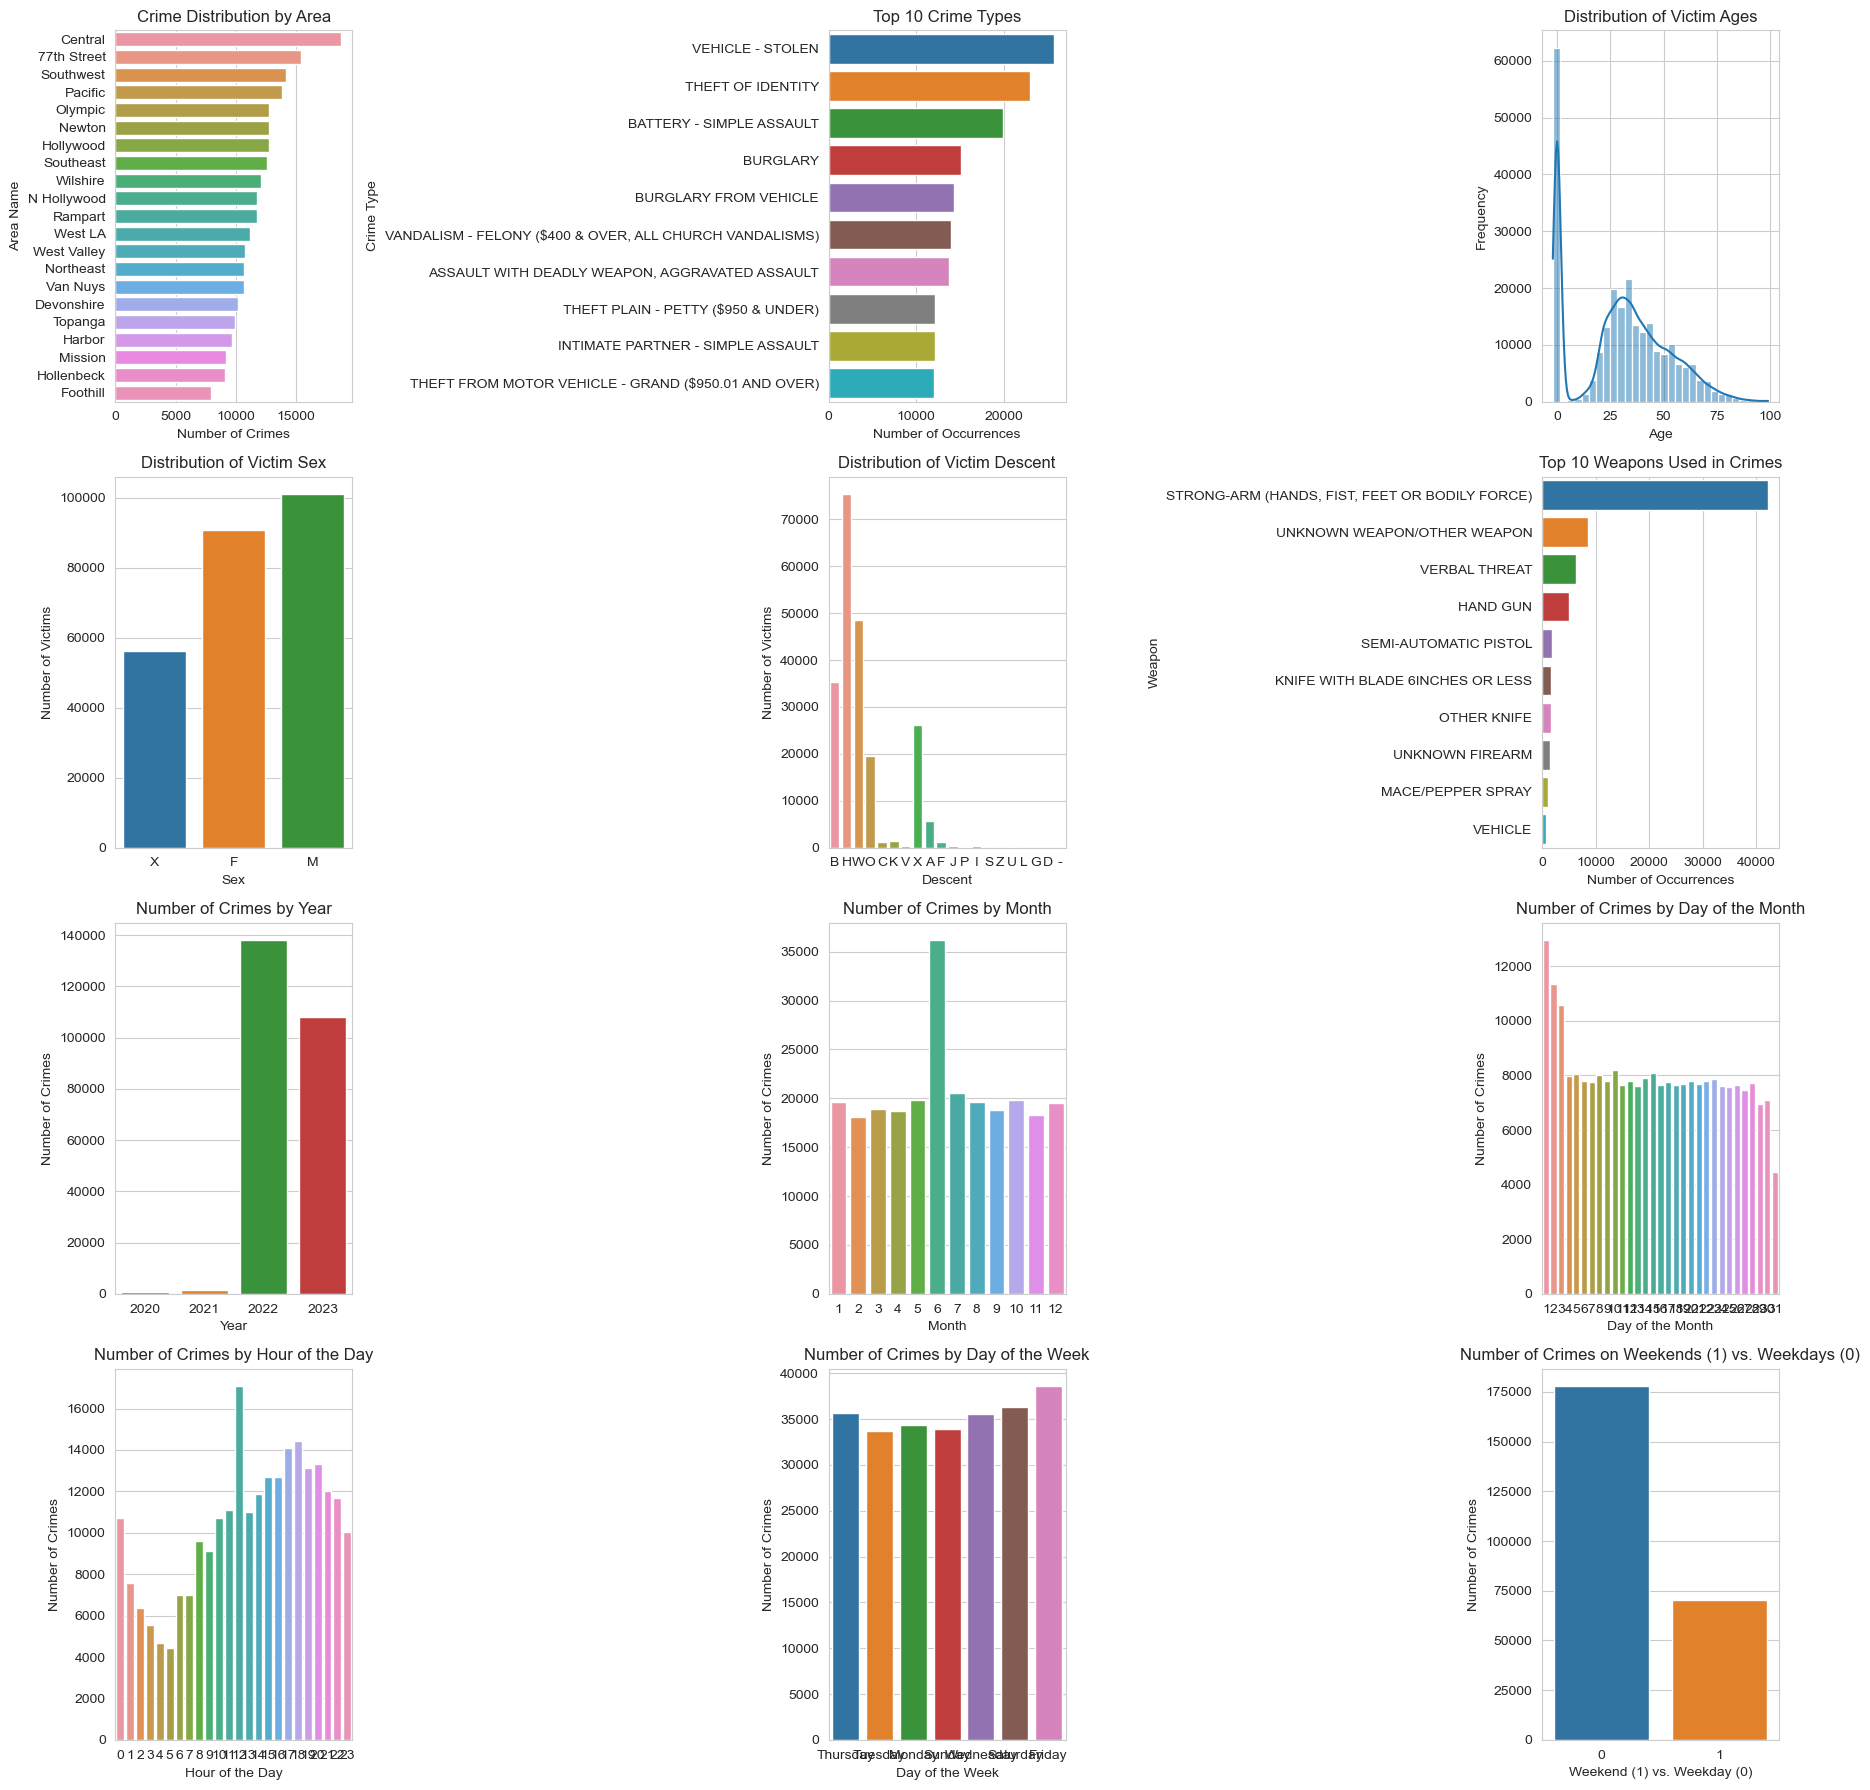

In [45]:
# Create a figure and subplots grid
fig, axes = plt.subplots(4, 3, figsize=(18, 18))

# Crime Distribution by Area
sns.countplot(data=crimes, y="AREA NAME", order=crimes['AREA NAME'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Crime Distribution by Area')
axes[0, 0].set_xlabel('Number of Crimes')
axes[0, 0].set_ylabel('Area Name')

# Crime Type Analysis
sns.countplot(data=crimes, y="CRM CD DESC", order=crimes['CRM CD DESC'].value_counts().index[:10], ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Crime Types')
axes[0, 1].set_xlabel('Number of Occurrences')
axes[0, 1].set_ylabel('Crime Type')

# Victim Demographics
sns.histplot(data=crimes, x="VICT AGE", bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Victim Ages')
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Frequency')

sns.countplot(data=crimes, x="VICT SEX", ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Victim Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Number of Victims')

sns.countplot(data=crimes, x="VICT DESCENT", ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Victim Descent')
axes[1, 1].set_xlabel('Descent')
axes[1, 1].set_ylabel('Number of Victims')

# Weapon Usage
sns.countplot(data=crimes, y="WEAPON DESC", order=crimes['WEAPON DESC'].value_counts().index[:10], ax=axes[1, 2])
axes[1, 2].set_title('Top 10 Weapons Used in Crimes')
axes[1, 2].set_xlabel('Number of Occurrences')
axes[1, 2].set_ylabel('Weapon')

# Temporal Analysis
sns.countplot(data=crimes, x="YEAR OCC", ax=axes[2, 0])
axes[2, 0].set_title('Number of Crimes by Year')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Number of Crimes')

sns.countplot(data=crimes, x="MONTH OCC", ax=axes[2, 1])
axes[2, 1].set_title('Number of Crimes by Month')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Number of Crimes')

sns.countplot(data=crimes, x="DAY OCC", ax=axes[2, 2])
axes[2, 2].set_title('Number of Crimes by Day of the Month')
axes[2, 2].set_xlabel('Day of the Month')
axes[2, 2].set_ylabel('Number of Crimes')

sns.countplot(data=crimes, x="HOUR OCC", ax=axes[3, 0])
axes[3, 0].set_title('Number of Crimes by Hour of the Day')
axes[3, 0].set_xlabel('Hour of the Day')
axes[3, 0].set_ylabel('Number of Crimes')

sns.countplot(data=crimes, x="DAY OF WEEK", ax=axes[3, 1])
axes[3, 1].set_title('Number of Crimes by Day of the Week')
axes[3, 1].set_xlabel('Day of the Week')
axes[3, 1].set_ylabel('Number of Crimes')

sns.countplot(data=crimes, x="WEEKEND", ax=axes[3, 2])
axes[3, 2].set_title('Number of Crimes on Weekends (1) vs. Weekdays (0)')
axes[3, 2].set_xlabel('Weekend (1) vs. Weekday (0)')
axes[3, 2].set_ylabel('Number of Crimes')

# Adjust layout
plt.tight_layout()
plt.show()
